In [ ]:
# Ensure seaborn is available and import it
%pip install seaborn --quiet
import seaborn as sns
print("seaborn version:", sns.__version__)


## Loading Data

In [ ]:
import pandas as pd

csv_path = "../data/breast-cancer-diagnostic.shuf.lrn.csv"

df = pd.read_csv(csv_path)
target = df['class']
data = df.drop(columns=['class'])
df.head()


,ID,class,radiusMean,textureMean,perimeterMean,areaMean,smoothnessMean,compactnessMean,concavityMean,concavePointsMean,...,radiusWorst,textureWorst,perimeterWorst,areaWorst,smoothnessWorst,compactnessWorst,concavityWorst,concavePointsWorst,symmetryWorst,fractalDimensionWorst
0,8813129,False,13.27,17.02,84.55,546.4,0.08445,0.04994,0.03554,0.024560,...,15.14,23.60,98.84,708.8,0.1276,0.1311,0.17860,0.09678,0.2506,0.07623
1,898678,False,12.06,18.90,76.66,445.3,0.08386,0.05794,0.00751,0.008488,...,13.64,27.06,86.54,562.6,0.1289,0.1352,0.04506,0.05093,0.2880,0.08083
2,917896,False,13.71,18.68,88.73,571.0,0.09916,0.10700,0.05385,0.037830,...,15.11,25.63,99.43,701.9,0.1425,0.2566,0.19350,0.12840,0.2849,0.09031
3,869691,True,11.80,16.58,78.99,432.0,0.10910,0.17000,0.16590,0.074150,...,13.74,26.38,91.93,591.7,0.1385,0.4092,0.45040,0.18650,0.5774,0.10300
4,9110127,True,18.03,16.85,117.50,990.0,0.08947,0.12320,0.10900,0.062540,...,20.38,22.02,133.30,1292.0,0.1263,0.2666,0.42900,0.15350,0.2842,0.08225


## Preprocessing 

In [ ]:
import pandas as pd

if 'class' in df.columns:
    col = df['class']
    if pd.api.types.is_bool_dtype(col):
        df['class'] = col.astype(int)
    else:
        mapping = {True: 1, False: 0, 'true': 1, 'false': 0, 'True': 1, 'False': 0, 1: 1, 0: 0}
        df['class'] = col.map(mapping)
        if df['class'].isna().any():
            # Fallback: try to coerce case-insensitively
            df['class'] = col.astype(str).str.lower().map({'true': 1, 'false': 0}).astype('Int64')
            df['class'] = df['class'].astype(int)
    df['class'].value_counts()
else:
    print("Column `class` not found in DataFrame.")


In [7]:
missing_counts = df.isna().sum()
print("Total missing values:", int(missing_counts.sum()))


Total missing values: 0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       285 non-null    int64  
 1   class                    285 non-null    bool   
 2   radiusMean               285 non-null    float64
 3    textureMean             285 non-null    float64
 4    perimeterMean           285 non-null    float64
 5    areaMean                285 non-null    float64
 6    smoothnessMean          285 non-null    float64
 7    compactnessMean         285 non-null    float64
 8    concavityMean           285 non-null    float64
 9    concavePointsMean       285 non-null    float64
 10   symmetryMean            285 non-null    float64
 11   fractalDimensionMean    285 non-null    float64
 12   radiusStdErr            285 non-null    float64
 13   textureStdErr           285 non-null    float64
 14   perimeterStdErr         2

In [9]:
display(df.describe())

,ID,radiusMean,textureMean,perimeterMean,areaMean,smoothnessMean,compactnessMean,concavityMean,concavePointsMean,symmetryMean,...,radiusWorst,textureWorst,perimeterWorst,areaWorst,smoothnessWorst,compactnessWorst,concavityWorst,concavePointsWorst,symmetryWorst,fractalDimensionWorst
count,2.850000e+02,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,...,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000
mean,2.861498e+07,14.068674,19.116211,91.555053,649.617895,0.095851,0.102605,0.085587,0.047930,0.182908,...,16.214354,25.568737,106.866175,878.226316,0.131940,0.251042,0.263251,0.113729,0.291636,0.083341
std,1.204247e+08,3.486377,4.516754,24.028687,343.979266,0.013894,0.051422,0.075717,0.037409,0.028606,...,4.820742,6.318778,33.390308,572.257246,0.022377,0.153795,0.199783,0.067461,0.062957,0.016335
min,8.670000e+03,6.981000,10.380000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.121500,...,7.930000,12.490000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.160300,0.058430
25%,8.711490e+05,11.690000,15.900000,74.680000,418.700000,0.086000,0.062190,0.026880,0.020690,0.162100,...,13.010000,20.720000,84.160000,515.300000,0.116600,0.141500,0.111700,0.064130,0.250600,0.071910
50%,9.065390e+05,13.280000,18.700000,86.100000,546.400000,0.095140,0.092280,0.061950,0.033260,0.181400,...,14.970000,25.410000,97.820000,684.500000,0.131200,0.215800,0.217700,0.099750,0.284100,0.079570
75%,8.811523e+06,16.070000,21.840000,105.800000,797.800000,0.105100,0.130400,0.122600,0.073400,0.197600,...,19.070000,30.280000,126.300000,1124.000000,0.144000,0.323500,0.382900,0.162800,0.319800,0.090750
max,9.113205e+08,27.420000,39.280000,186.900000,2501.000000,0.163400,0.345400,0.410800,0.168900,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.218400,0.937900,0.901900,0.290300,0.577400,0.143100


In [10]:
df["class"].value_counts(), df["class"].value_counts(normalize=True)

(class
 False    177
 True     108
 Name: count, dtype: int64,
 class
 False    0.621053
 True     0.378947
 Name: proportion, dtype: float64)

In [11]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

print("Numeric columns:", numeric_cols)
print("Categorical columns:", categorical_cols)

Numeric columns: ['ID', 'radiusMean', ' textureMean', ' perimeterMean', ' areaMean', ' smoothnessMean', ' compactnessMean', ' concavityMean', ' concavePointsMean', ' symmetryMean', ' fractalDimensionMean', ' radiusStdErr', ' textureStdErr', ' perimeterStdErr', ' areaStdErr', ' smoothnessStdErr', ' compactnessStdErr', ' concavityStdErr', ' concavePointsStdErr', ' symmetryStdErr', ' fractalDimensionStdErr', ' radiusWorst', ' textureWorst', ' perimeterWorst', ' areaWorst', ' smoothnessWorst', ' compactnessWorst', ' concavityWorst', ' concavePointsWorst', ' symmetryWorst', ' fractalDimensionWorst']
Categorical columns: ['class']


In [12]:
df.columns = df.columns.str.strip()

In [13]:
df = df.drop(columns=["ID"])

In [14]:
df["class"].value_counts(), df["class"].value_counts(normalize=True)

(class
 False    177
 True     108
 Name: count, dtype: int64,
 class
 False    0.621053
 True     0.378947
 Name: proportion, dtype: float64)

Matplotlib is building the font cache; this may take a moment.


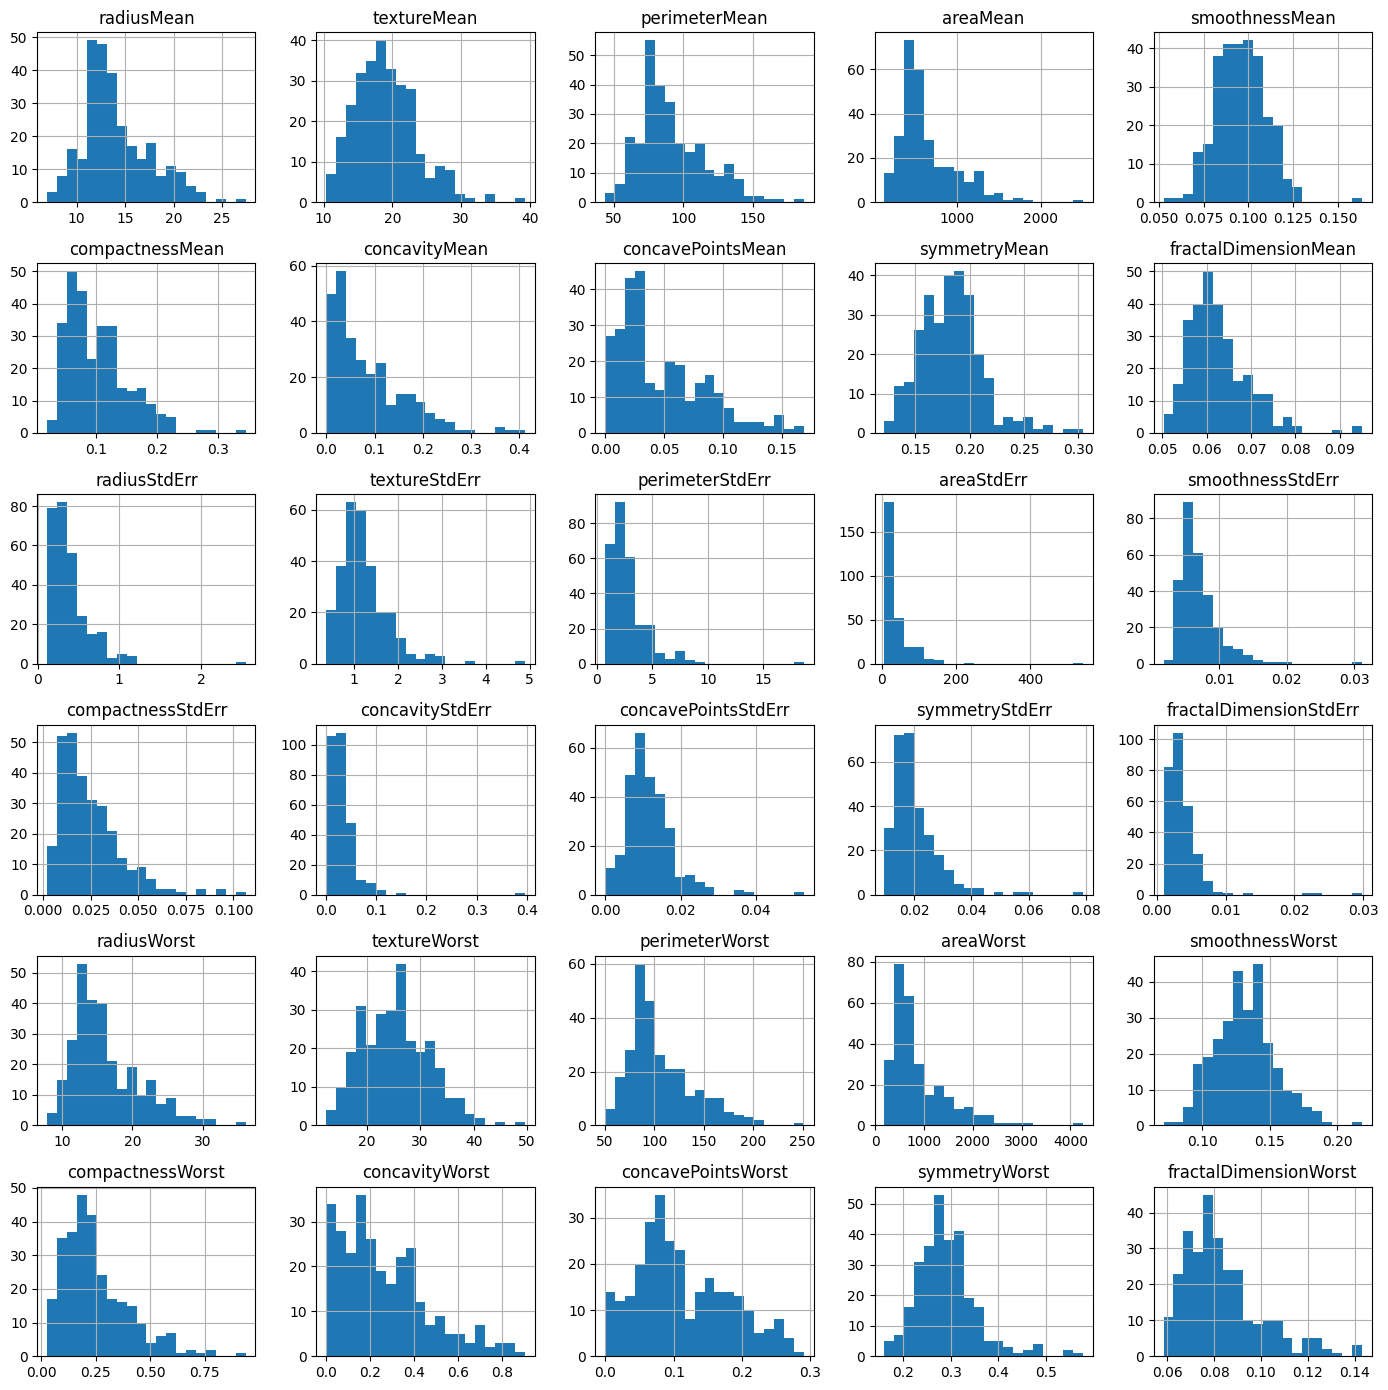

In [15]:
import matplotlib.pyplot as plt
df.hist(bins=20, figsize=(14, 14))
plt.tight_layout()
plt.show()

In [16]:
import seaborn as sns

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(16, 12))
for i, col in enumerate(numeric_cols[:12]):
    plt.subplot(3, 4, i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

ModuleNotFoundError: No module named 'seaborn'